<img src="task.png" width=700 />

In [121]:
import numpy as np
import matplotlib.pyplot as plt

### Из задачи 7.2. Посчитаем все необходимые коэффициенты

In [122]:
h = 0.005
N = int(1/h)

def calculate_coefficients(x):
    """
    Вычисляет коэффициенты p, q, f для заданного массива x.
    """
    p = np.zeros_like(x)
    q = -(10 + np.sin(2 * np.pi * x))
    f = np.cos(2 * np.pi * x)
    return p, q, f

### Метод прогонки

In [123]:
def solve_system(p, q, f, h):
    """
    Решает систему дифференциальных уравнений методом прогонки.
    """
    N = len(p)
    a = 1 - 1/2 * p * h
    b = 2 - q * h**2
    c = 1 + 1/2 * p * h
    phi = f * h**2
    a = 1 - 1/2 * p * h
    b = 2 - q * h**2
    c = 1 + 1/2 * p * h
    phi = f * h**2

    alpha = np.zeros(N)
    beta  = np.zeros(N)
    gamma = np.zeros(N)
    alpha[1] = c[0]/b[0]
    beta[1] = -phi[0]/b[0]
    gamma[1] = a[0]/b[0]

    for k in range(1, N - 1):
        alpha[k+1] = c[k]/(b[k] - alpha[k]*a[k])
        beta[k+1] = (a[k]*beta[k] - phi[k]) / (b[k] - alpha[k]/a[k])
        gamma[k+1] = a[k]*gamma[k] / (b[k] - alpha[k]*a[k])

    mu = np.zeros(N)
    nu = np.zeros(N)

    mu[N-1] = -c[N-1] / (a[N-1]*(alpha[N-1] + gamma[N-1]) - b[N-1])
    nu[N-1] = (phi[N-1] - a[N-1]*beta[N-1]) / (a[N-1]*(alpha[N-1] + gamma[N-1]) - b[N-1])

    for n in range(N - 1, 0, -1):
        mu[n-1] = alpha[n]*mu[n] + gamma[n]*mu[N-1]
        nu[n-1] = beta[n] + alpha[n]*nu[n] + gamma[n]*nu[N-1]

    y = np.zeros(N)

    y[0] = nu[0] / (1 - mu[0])
    y[N-1] = mu[N-1]*y[0] + nu[N-1]

    for n in range(N - 1, 0, -1):
        y[n-1] = alpha[n]*y[n] + beta[n] + gamma[n]*y[N-1]

    return y


In [124]:
def plot_solution(x, y):
    """
    Строит график решения.
    """
    x_extended = np.tile(x, 5)
    n = np.array(np.linspace(0, 5 * len(x) - 1, 5 * len(x), dtype=np.float64))
    n = n[:200]
    plt.figure(figsize=(10, 6))
    plt.plot(n, y)

    plt.title("Solve")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


### Решение


(200,)
(200,)


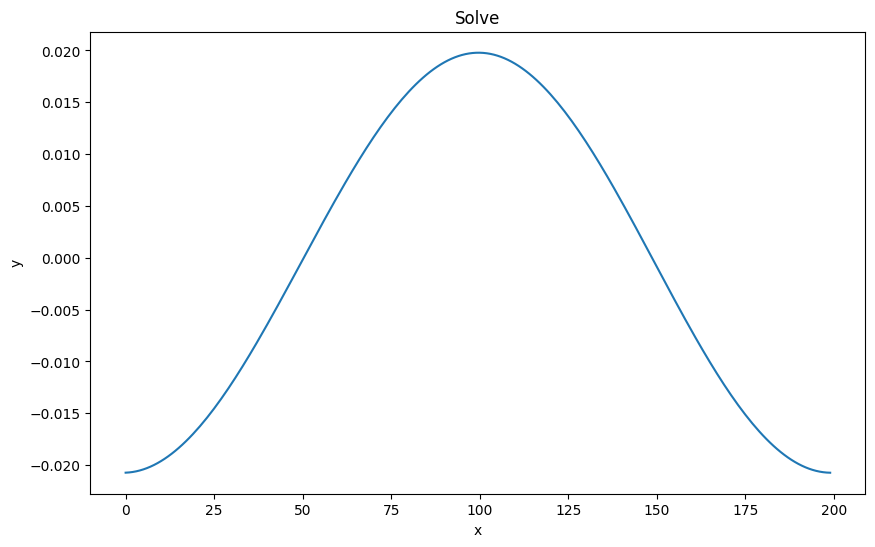

In [125]:
def main():
    x = np.array(np.linspace(0, 1, N))
    p, q, f = calculate_coefficients(x)
    y = solve_system(p, q, f, h)
    print(y.shape)
    print(x.shape)
    plot_solution(x, y)

if __name__ == "__main__":
    main()